# Classification Tree

In [1]:
import numpy as np
from sklearn import tree
import matplotlib as plt
import seaborn as sns
from math import inf
from tparbressource import *

sns.set()

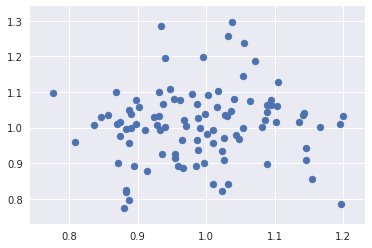

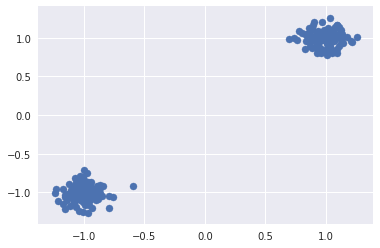

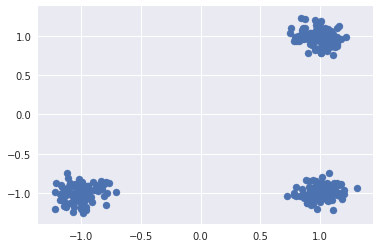

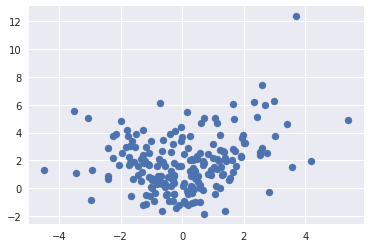

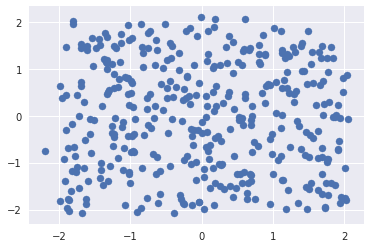

In [2]:
plot_2d_simple(rand_gauss())
plt.show()
plot_2d_simple(rand_bi_gauss())
plt.show()
plot_2d_simple(rand_tri_gauss())
plt.show()
plot_2d_simple(rand_clown())
plt.show()
plot_2d_simple(rand_checkers())
plt.show()

## Decision tree - CART algorithm

### Question 1

### Question 2

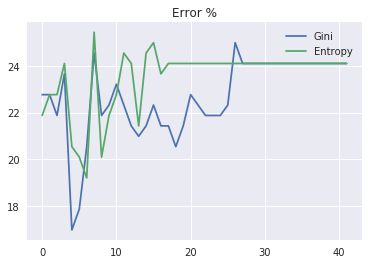

ValueError: Number of features of the model must match the input. Model n_features is 1 and input n_features is 2 

In [9]:
d = rand_checkers(112, 112, 112, 112)

errG = []
for i in range(42):
    trG = tree.DecisionTreeClassifier("gini", max_depth=i+1)
    trG.fit(d[:224,:1], d[:224,2])
    errG.append(trG.score(d[224:,:1], d[224:,2])*100)

errH = []
errHmin = inf
trHmin = tree.DecisionTreeClassifier()
for i in range(42):
    trH = tree.DecisionTreeClassifier("entropy", max_depth=i+1)
    trH.fit(d[:224,:1], d[:224,2])
    err = trH.score(d[224:,:1], d[224:,2])*100
    errH.append(err)
    if err < errHmin:
        trHmin = trH
        errHmin = err

plt.plot(errG, label='Gini')
plt.plot(errH, label='Entropy')
plt.title('Error %')
plt.legend()
plt.show()

frontiere(trHmin.apply, d[d[:,2]==0, :2])
frontiere(trHmin.apply, d[d[:,2]==1, :2])
frontiere(trHmin.apply, d[d[:,2]==2, :2])
frontiere(trHmin.apply, d[d[:,2]==3, :2])